In [3]:
import numpy as np
# import scipy.linalg
import matplotlib.pyplot as plt


In [10]:

# Define the Gaussian kernel
def gaussian_kernel(x, sigma=1.0):
    return np.exp(-x**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

# Define the function to create the convolution matrix A
def create_convolution_matrix(kernel, n):
    m = len(kernel)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(i - m // 2, i + m // 2 + 1):
            if 0 <= j < n:
                A[i, j] = kernel[i - j]
    return A

def calculate_mse(x,x_hat):
    return np.sum((x-x_hat)**2)

def calculate_bias_variance(A, lambda_, x, sigma):
    _, S, V = np.linalg.svd(A)
    bias_ = 0
    variance_ = 0
    for i in range(len(S)):
        bias_ += (1 - S[i]**2 / (S[i]**2 + lambda_) )**2 * (V[i].T @ x)**2
        variance_ += (S[i] / (S[i]**2 + lambda_) )**2 * sigma**2
        
    return bias_, variance_
    


In [11]:
# Generate the original signal
n = 100
x = np.sin(2 * np.pi * np.arange(n) / n)

# Generate the convolution matrix A
kernel = gaussian_kernel(np.arange(-10, 11), sigma=2.0)
A = create_convolution_matrix(kernel, n)

# Generate the noisy measurement
sigma = 0.1
y = A @ x + np.random.normal(scale=sigma, size=n)

# Implement Tikhonov regularization
lambda_ = np.arange(1e-4, 1e-1, 1e-3)
mse_list = []
bias_list = []
variance_list = []

for lmbda in lambda_:
    x_hat = np.linalg.solve(A.T @ A + lmbda * np.eye(n), A.T @ y)
    mse = calculate_mse(x,x_hat)
    bias, variance = calculate_bias_variance(A, lmbda, x, sigma)
    mse_list.append(mse)
    bias_list.append(bias)
    variance_list.append(variance)


In [ ]:

# Plot the original signal, the noisy measurement, and the recovered signal
plt.figure(figsize=(12, 6))
plt.plot(x, label='Original signal')
plt.plot(y, label='Noisy measurement')
plt.plot(x_hat, label='Recovered signal')
plt.legend()
plt.show()

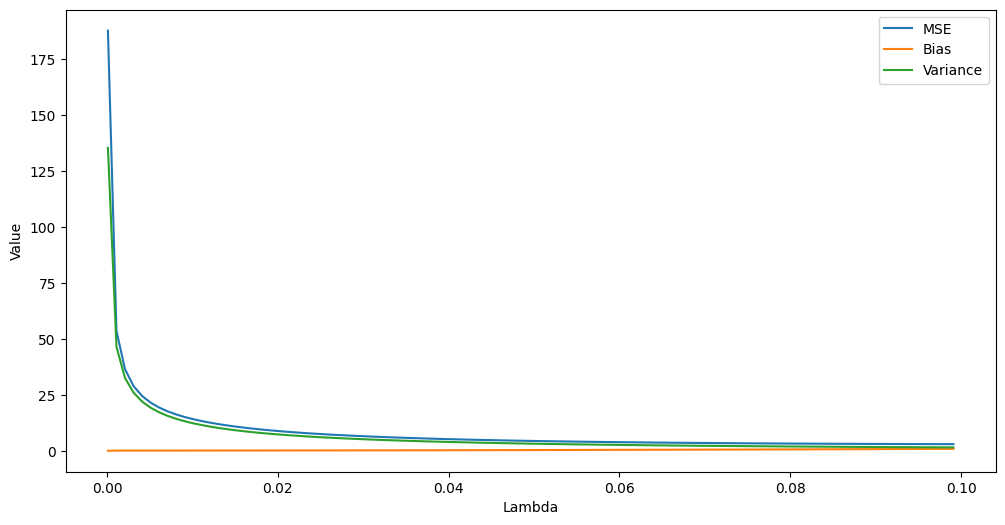

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(lambda_, mse_list, label='MSE')
plt.plot(lambda_,bias_list, label='Bias')
plt.plot(lambda_,variance_list, label='Variance')
plt.xlabel('Lambda')
plt.ylabel('Value')
plt.legend()
plt.show()